<a href="https://colab.research.google.com/github/ReidelVichot/DE_CAI_broadband/blob/main/MergingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this notebook is to merge and clean the datasets that might be used for future research.

In [ ]:
#-- connect to google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#-- install packages
!pip install geopandas

In [ ]:
#-- import packages
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [62]:
#-- import shapefiles
ct = gpd.read_file("/content/drive/MyDrive/BroadbandOrg/tl_2020_10_all/tl_2020_10_tabblock20.shp")


<Axes: >

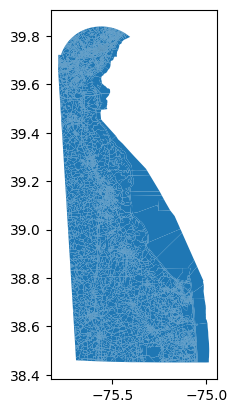

In [63]:
#-- test shapefiles
ct.plot()

In [64]:
ct.head(5)

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,10,003,016611,1001,100030166111001,Block 1001,G5040,NaN,NaN,NaN,S,227781,0,+39.5484613,-075.6515952,"POLYGON ((-75.65542 39.54930, -75.65459 39.549..."
1,10,003,011800,2010,100030118002010,Block 2010,G5040,NaN,NaN,NaN,S,105539,0,+39.7708938,-075.5979215,"POLYGON ((-75.59892 39.77281, -75.59887 39.773..."
2,10,003,016610,1026,100030166101026,Block 1026,G5040,NaN,NaN,NaN,S,1571084,0,+39.4286213,-075.7468751,"POLYGON ((-75.75740 39.43498, -75.75734 39.435..."
3,10,003,014404,1023,100030144041023,Block 1023,G5040,NaN,NaN,NaN,S,14227,0,+39.6799763,-075.7838066,"POLYGON ((-75.78475 39.68048, -75.78470 39.680..."
4,10,003,010200,2001,100030102002001,Block 2001,G5040,NaN,NaN,NaN,S,20711,0,+39.8121236,-075.4696898,"POLYGON ((-75.47102 39.81160, -75.47086 39.811..."


In [66]:
ct.GEOID20.dtype

dtype('O')

In [67]:
ct["GEOID20"] = ct["GEOID20"].astype(int)

In [71]:
ct.shape

(20198, 16)

In [23]:
#-- import fcc datasets
cable = pd.read_csv("/content/drive/MyDrive/BroadbandOrg/bdc_10_Cable_fixed_broadband_123122.csv")
copper = pd.read_csv("/content/drive/MyDrive/BroadbandOrg/bdc_10_Copper_fixed_broadband_123122.csv")
fiber = pd.read_csv("/content/drive/MyDrive/BroadbandOrg/bdc_10_Fiber-to-the-Premises_fixed_broadband_123122.csv")

In [33]:
#-- test datasets
print(cable.shape)
print(copper.shape)
print(fiber.shape)

(371926, 12)
(112127, 12)
(195057, 12)


In [40]:
#-- merge/concatenate datasets
connection = pd.concat([cable, copper, fiber])

In [46]:
#-- test dataset
len(connection.block_geoid.unique())

15454

In [70]:
connection.shape

(679110, 12)

In [48]:
len(connection.location_id.unique())

371725

In [51]:
connection.head(5)

,frn,provider_id,brand_name,location_id,technology,max_advertised_download_speed,max_advertised_upload_speed,low_latency,business_residential_code,state_usps,block_geoid,h3_res8_id
0,3768165,130317,Xfinity,1062716001,40,1200,35,1,X,DE,100030131002000,882aaca98bfffff
1,3768165,130317,Xfinity,1062720485,40,1200,35,1,X,DE,100030163091001,882aac32c1fffff
2,3768165,130317,Xfinity,1062730641,40,2000,200,1,X,DE,100030028001057,882aacaaa3fffff
3,3768165,130317,Xfinity,1062732363,40,1200,35,1,X,DE,100030136123003,882aac06ddfffff
4,3768165,130317,Xfinity,1062733787,40,1200,35,1,X,DE,100030114003008,882aacaa0bfffff


In [52]:
connection.brand_name.unique()

array(['Xfinity', 'Mediacom Delaware LLC', 'Breezeline',
       'Mediacom Minnesota LLC', 'Mediacom Southeast LLC', 'Verizon',
       'TPx Communications', 'Crown Castle Fiber LLC', 'Telesystem',
       'NetCarrier Telecom, Inc.', 'Bay Country Communications',
       'ZAYO GROUP, LLC', 'Xtel Communications', 'NetFortris', 'Netrix'],
      dtype=object)

In [55]:
connection.block_geoid.dtype

dtype('int64')

In [68]:
#-- merge new dataset with geopandas using block_geoid as connector
connection.merge(ct, left_on="block_geoid", right_on="GEOID20")

,frn,provider_id,brand_name,location_id,technology,max_advertised_download_speed,max_advertised_upload_speed,low_latency,business_residential_code,state_usps,...,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,3768165,130317,Xfinity,1062716001,40,1200,35,1,X,DE,...,G5040,NaN,NaN,NaN,S,301008,0,+39.7261245,-075.6485363,"POLYGON ((-75.65183 39.72613, -75.65175 39.726..."
1,3768165,130317,Xfinity,1062729889,40,1200,35,1,X,DE,...,G5040,NaN,NaN,NaN,S,301008,0,+39.7261245,-075.6485363,"POLYGON ((-75.65183 39.72613, -75.65175 39.726..."
2,3768165,130317,Xfinity,1062729864,40,1200,35,1,X,DE,...,G5040,NaN,NaN,NaN,S,301008,0,+39.7261245,-075.6485363,"POLYGON ((-75.65183 39.72613, -75.65175 39.726..."
3,3768165,130317,Xfinity,1062715970,40,1200,35,1,X,DE,...,G5040,NaN,NaN,NaN,S,301008,0,+39.7261245,-075.6485363,"POLYGON ((-75.65183 39.72613, -75.65175 39.726..."
4,3768165,130317,Xfinity,1062715987,40,1200,35,1,X,DE,...,G5040,NaN,NaN,NaN,S,301008,0,+39.7261245,-075.6485363,"POLYGON ((-75.65183 39.72613, -75.65175 39.726..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679105,6254403,400092,Crown Castle Fiber LLC,1062907309,50,0,0,0,B,DE,...,G5040,NaN,NaN,NaN,S,69381,0,+39.3269647,-075.6218364,"POLYGON ((-75.62426 39.32931, -75.62048 39.327..."
679106,3271798,131425,Verizon,1354337362,50,940,880,1,X,DE,...,G5040,NaN,NaN,NaN,S,57159,0,+38.6489973,-075.2290280,"POLYGON ((-75.23695 38.64869, -75.23693 38.648..."
679107,3271798,131425,Verizon,1354272921,50,940,880,1,X,DE,...,G5040,NaN,NaN,NaN,S,78630,0,+38.6435322,-075.1903259,"POLYGON ((-75.19206 38.64342, -75.19202 38.643..."
679108,3271798,131425,Verizon,1354257756,50,940,880,1,X,DE,...,G5040,NaN,NaN,NaN,S,39224,0,+38.6135081,-075.1642777,"POLYGON ((-75.16596 38.61399, -75.16590 38.614..."
